In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [111]:
d = pd.read_csv('../tables/d.csv', parse_dates=['Time_Start', 'Time_Stop', 'Time_Mid'])
d_no_na = d.dropna(subset=['RI']).reset_index(drop=True)
ind = list(range(0, len(d_no_na)))

In [5]:
# Run above code for remaining cells to function

Text(0, 0.5, 'RI')

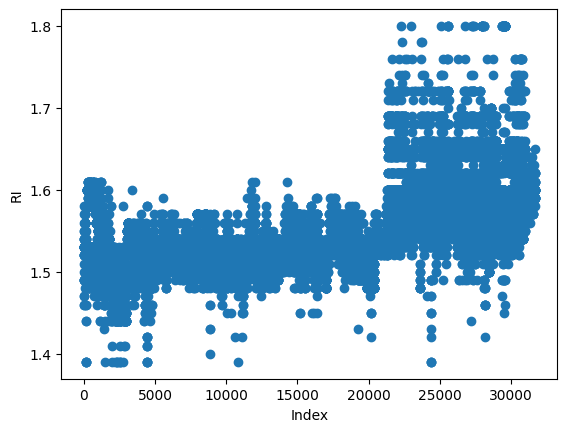

In [92]:
fig, ax = plt.subplots()
ax.scatter(ind, d['RI'], label='Time_Mid')
ax.set_xlabel('Index')
ax.set_ylabel('RI')

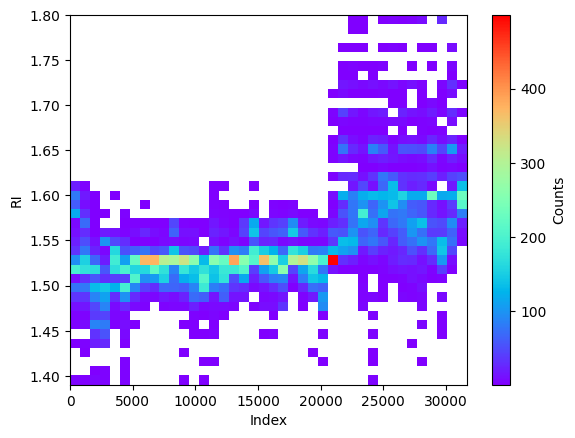

In [88]:
fig, ax = plt.subplots()
# Create a 2D histogram
h = ax.hist2d(ind, d['RI'], bins=(40, 40), cmap='rainbow', cmin=1)
ax.set_xlabel('Index')
ax.set_ylabel('RI')
plt.colorbar(h[3], ax=ax, label='Counts')  # Add a colorbar for density

In [112]:
d_no_na[d['Time_Mid'] > '2024-07-01']

,Time_Start,Time_Stop,Time_Mid,RH,Dp,RI,GF
21227,2024-07-22 11:05:15,2024-07-22 11:05:17,2024-07-22 11:05:16.000,85.0,200.0,1.56,1.40
21228,2024-07-22 11:05:17,2024-07-22 11:05:19,2024-07-22 11:05:18.000,85.2,200.0,1.57,1.27
21229,2024-07-22 11:05:19,2024-07-22 11:05:21,2024-07-22 11:05:20.000,84.6,200.0,1.56,1.40
21230,2024-07-22 11:05:21,2024-07-22 11:05:23,2024-07-22 11:05:22.000,83.4,200.0,1.56,1.40
21231,2024-07-22 11:05:23,2024-07-22 11:05:24,2024-07-22 11:05:23.500,82.8,200.0,1.57,1.40
...,...,...,...,...,...,...,...
31676,2024-08-16 17:42:58,2024-08-16 17:42:59,2024-08-16 17:42:58.500,86.4,200.0,1.59,1.64
31677,2024-08-16 17:42:59,2024-08-16 17:43:00,2024-08-16 17:42:59.500,85.8,200.0,1.59,1.62
31678,2024-08-16 17:43:00,2024-08-16 17:43:01,2024-08-16 17:43:00.500,85.2,200.0,1.59,1.62
31679,2024-08-16 17:43:01,2024-08-16 17:43:02,2024-08-16 17:43:01.500,84.9,200.0,1.59,1.62


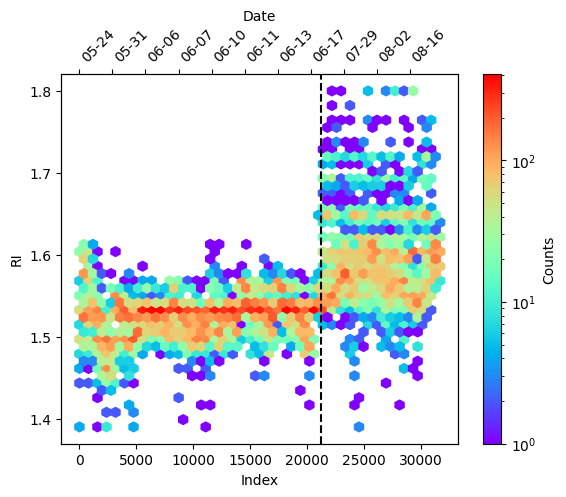

In [120]:
fig, ax = plt.subplots()
# Create a hexbin plot
hb = ax.hexbin(ind, d['RI'], gridsize=40, cmap='rainbow', bins='log')
ax.set_xlabel('Index')
ax.set_ylabel('RI')
ax.axvline(21227, c='black', alpha=1, ls='--')
# Set the positions and labels for the top axis
index_ticks = np.arange(0, ind[-1], 2900)  # Every 5000 index points
date_labels = d_no_na['Time_Mid'].iloc[index_ticks].dt.strftime('%m-%d')  # Format dates
ax2 = ax.twiny()
ax2.set_xticks(index_ticks)
ax2.set_xticklabels(date_labels, rotation=45, ha='left')  # Rotate labels for better readability
ax2.set_xlim(ax.get_xlim())  # Align the top axis limits with the bottom axis
ax2.set_xlabel('Date')
plt.colorbar(hb, ax=ax, label='Counts')  # Add a colorbar for density
plt.savefig('../figures/RI_hexbin.png', dpi=300, bbox_inches='tight')

In [101]:
ax.get_xlim()

(np.float64(0.0), np.float64(31680.0))

In [95]:
index_ticks

array([    0,  2500,  5000,  7500, 10000, 12500, 15000, 17500, 20000,
       22500, 25000, 27500, 30000])

In [ ]:
# Create a 2D histogram
h = ax.hist2d(d.index, d['RI'], bins=(50, 50), cmap='viridis', cmin=1)
ax.set_xlabel('Index')
ax.set_ylabel('RI')
plt.colorbar(h[3], ax=ax, label='Counts')  # Add a colorbar for density

Text(0, 0.5, 'Count')

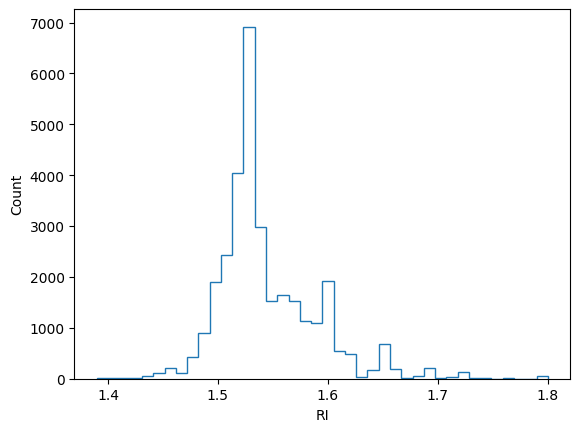

In [40]:
fig, ax = plt.subplots()
counts, bins = np.histogram(d['RI'], bins=40)
ax.stairs(counts, bins)
ax.set_xlabel('RI')
ax.set_ylabel('Count')